## EDA

 Búsqueda de valores faltantes, valores atípicos/extremos u outliers y registros duplicados. Asimismo, la utilización de gráficos coherentes según la tipología de variable que corresponda resulta esencial.

In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

Al obsrevar previamente el archivo con los datos de 'Internet', nos percatamos que es una hoja de cálculo con varias hojas solo voy a tomar las que crea necesarias para este proyecto, basandome en las que tienen datos relevantes o que necesitemos para el proyecto.

In [241]:
archivo='DATA\Internet.xlsx'
df_velsinrangos=pd.read_excel(archivo, sheet_name='Velocidad_sin_Rangos') 
df_a_vel = pd.read_excel(archivo, sheet_name='Accesos por velocidad') 
df_a_tec = pd.read_excel(archivo, sheet_name='Accesos Por Tecnología')
df_p_hog = pd.read_excel(archivo, sheet_name='Penetracion-hogares')
df_p_pob = pd.read_excel(archivo, sheet_name='Penetración-poblacion')
df_p_tot = pd.read_excel(archivo, sheet_name='Penetracion-totales') 
df_ing =pd.read_excel(archivo, sheet_name='Ingresos ')

Obsevo el df e información de cada hoja 

In [242]:
df_velsinrangos.head()

,Año,Trimestre,Provincia,Otros,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",...,2048 Mbps,2529 Mbps,3072 Mbps,4000 Mbps,5000 Mbps,5125 Mbps,6000 Mbps,7000 Mbps,8000 Mbps,10000 Mbps
0,2024.0,1.0,Buenos Aires,125147.0,18.0,0.0,0.0,25815.0,169.0,4611.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2024.0,1.0,Capital Federal,0.0,31.0,0.0,0.0,451.0,34.0,1307.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2024.0,1.0,Catamarca,70.0,0.0,0.0,0.0,34.0,37.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2024.0,1.0,Chaco,3816.0,0.0,0.0,0.0,234.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2024.0,1.0,Chubut,16640.0,8.0,0.0,0.0,69.0,34.0,836.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [243]:
df_velsinrangos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Columns: 193 entries, Año to 10000 Mbps
dtypes: float64(191), int64(1), object(1)
memory usage: 942.5+ KB


In [245]:
df_a_vel.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2024,1,Buenos Aires,26002.0,22510.0,221185.0,233225.0,241778.0,106418.0,4068292.0,125147.0,5044557.0
1,2024,1,Capital Federal,516.0,5418.0,29753.0,51415.0,37369.0,5957.0,1374283.0,0.0,1504711.0
2,2024,1,Catamarca,71.0,176.0,2872.0,3424.0,4204.0,1822.0,62294.0,70.0,74933.0
3,2024,1,Chaco,236.0,416.0,14156.0,9044.0,5533.0,5718.0,116624.0,3816.0,155543.0
4,2024,1,Chubut,111.0,1083.0,43828.0,31885.0,23024.0,20261.0,33844.0,16640.0,170676.0


In [246]:
df_a_vel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  984 non-null    int64  
 1   Trimestre            984 non-null    int64  
 2   Provincia            984 non-null    object 
 3   HASTA 512 kbps       984 non-null    float64
 4   + 512 Kbps - 1 Mbps  984 non-null    float64
 5   + 1 Mbps - 6 Mbps    984 non-null    float64
 6   + 6 Mbps - 10 Mbps   984 non-null    float64
 7   + 10 Mbps - 20 Mbps  984 non-null    float64
 8   + 20 Mbps - 30 Mbps  984 non-null    float64
 9   + 30 Mbps            984 non-null    float64
 10  OTROS                978 non-null    float64
 11  Total                984 non-null    float64
dtypes: float64(9), int64(2), object(1)
memory usage: 92.4+ KB


In [247]:
df_a_tec.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2024,1,Buenos Aires,203297.0,2790663.0,1799013.0,150290.0,101294.0,5044557.0
1,2024,1,Capital Federal,70108.0,1177475.0,203756.0,4493.0,48879.0,1504711.0
2,2024,1,Catamarca,5901.0,11025.0,56542.0,1384.0,81.0,74933.0
3,2024,1,Chaco,11343.0,58929.0,64463.0,8404.0,12404.0,155543.0
4,2024,1,Chubut,26306.0,77217.0,26356.0,30867.0,9930.0,170676.0


In [248]:
df_a_tec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           985 non-null    object 
 1   Trimestre     985 non-null    object 
 2   Provincia     984 non-null    object 
 3   ADSL          984 non-null    float64
 4   Cablemodem    984 non-null    float64
 5   Fibra óptica  984 non-null    float64
 6   Wireless      984 non-null    float64
 7   Otros         984 non-null    float64
 8   Total         984 non-null    float64
dtypes: float64(6), object(3)
memory usage: 69.5+ KB


In [249]:
df_p_hog.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2024,1,Buenos Aires,81.10
1,2024,1,Capital Federal,119.53
2,2024,1,Catamarca,68.82
3,2024,1,Chaco,46.70
4,2024,1,Chubut,84.89


In [250]:
df_p_hog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           984 non-null    int64  
 1   Trimestre                     984 non-null    int64  
 2   Provincia                     984 non-null    object 
 3   Accesos por cada 100 hogares  984 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 30.9+ KB


In [251]:
df_p_pob.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hab
0,2024,1,Buenos Aires,27.80
1,2024,1,Capital Federal,48.78
2,2024,1,Catamarca,17.50
3,2024,1,Chaco,12.48
4,2024,1,Chubut,26.02


In [252]:
df_p_pob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Año                       984 non-null    int64  
 1   Trimestre                 984 non-null    int64  
 2   Provincia                 984 non-null    object 
 3   Accesos por cada 100 hab  984 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 30.9+ KB


In [253]:
df_p_tot.head()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2024,1,78.89,24.79,Ene-Mar 2024
1,2023,4,78.56,24.66,Oct-Dic 2023
2,2023,3,77.84,24.41,Jul-Sept 2023
3,2023,2,77.02,24.14,Abr-Jun 2023
4,2023,1,77.20,24.17,Ene-Mar 2023


In [254]:
df_p_tot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           41 non-null     int64  
 1   Trimestre                     41 non-null     int64  
 2   Accesos por cada 100 hogares  41 non-null     float64
 3   Accesos por cada 100 hab      41 non-null     float64
 4   Periodo                       41 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 1.7+ KB


In [255]:
df_ing.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2024,1,2.804191e+08,Ene-Mar 2024
1,2023,4,1.673760e+08,Oct-Dic 2023
2,2023,3,1.331066e+08,Jul-Sept 2023
3,2023,2,1.180603e+08,Jun-Mar 2023
4,2033,1,1.041350e+08,Ene-Mar 2023


In [256]:
df_ing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        41 non-null     int64  
 1   Trimestre                  41 non-null     int64  
 2   Ingresos (miles de pesos)  41 non-null     float64
 3   Periodo                    41 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ KB


## Valores faltantes/nulos

Una vez vi los df y tambien con la ayuda visual del documento en la hoja de cálculo vamos a iniciar con los valores faltantes

In [257]:
#Para mayor practicidad voy a hacer un diccionario con los df y sus nombres
dfs={'df_velsinrangos':df_velsinrangos,'df_a_vel':df_a_vel,'df_a_tec':df_a_tec,'df_p_pob':df_p_pob,'df_p_hog':df_p_hog,'df_p_tot':df_p_tot,'df_ing':df_ing}

In [258]:
#Iteramos para ver cuales dfs tiene valores faltantes y tratar cada uno 
for x,y in dfs.items():
    if y.isnull().any().any()!=0:
        print(f'el df {x} tiene valores faltantes')
        


el df df_velsinrangos tiene valores faltantes
el df df_a_vel tiene valores faltantes
el df df_a_tec tiene valores faltantes


In [259]:
#Vemos que podemos sustituir por 0 excepto en provincia, por lo que vere en que fila falta provencia ya que solo es 1 y decidir que hacer
df_velsinrangos.isnull().sum()

Año           1
Trimestre     1
Provincia     1
Otros         1
0,256 Mbps    1
             ..
5125 Mbps     1
6000 Mbps     1
7000 Mbps     1
8000 Mbps     1
10000 Mbps    1
Length: 193, dtype: int64

In [260]:
faltantes=df_velsinrangos[df_velsinrangos['Provincia'].isnull()]
print(faltantes)

     Año  Trimestre Provincia  Otros  0,256 Mbps  0,375 Mbps  0,625 Mbps  \
624  NaN        NaN       NaN    NaN         NaN         NaN         NaN   

     0,5 Mbps  0,512 Mbps  0,75 Mbps  ...  2048 Mbps  2529 Mbps  3072 Mbps  \
624       NaN         NaN        NaN  ...        NaN        NaN        NaN   

     4000 Mbps  5000 Mbps  5125 Mbps  6000 Mbps  7000 Mbps  8000 Mbps  \
624        NaN        NaN        NaN        NaN        NaN        NaN   

     10000 Mbps  
624         NaN  

[1 rows x 193 columns]


Observo que es una fila sin valores por lo que la eliminamos

In [261]:
df_velsinrangos=df_velsinrangos.dropna()

In [262]:
#Paso al siguiente df y veo que en la columna otros hay 6 valores faltantes
df_a_vel.isnull().sum()

Año                    0
Trimestre              0
Provincia              0
HASTA 512 kbps         0
+ 512 Kbps - 1 Mbps    0
+ 1 Mbps - 6 Mbps      0
+ 6 Mbps - 10 Mbps     0
+ 10 Mbps - 20 Mbps    0
+ 20 Mbps - 30 Mbps    0
+ 30 Mbps              0
OTROS                  6
Total                  0
dtype: int64

En la columna otros se usan valores númericos que superan los mbps mayores a las opciones dadas, por lo que para no perder informacion vamos a sustituir por 0

In [263]:
df_a_vel=df_a_vel.fillna(0)

In [264]:
#Paso al ultimo df 
df_a_tec.isnull().sum()

Año             1
Trimestre       1
Provincia       2
ADSL            2
Cablemodem      2
Fibra óptica    2
Wireless        2
Otros           2
Total           2
dtype: int64

In [265]:
#Como son 2 filas vamos a nalizarlas para ver siu las eliminamos o no 
fal=df_a_tec[df_a_tec['Provincia'].isnull()]
print(fal)

     Año                                          Trimestre Provincia  ADSL  \
984  NaN                                                NaN       NaN   NaN   
985    *  Los datos provinciales no coinciden a nivel na...       NaN   NaN   

     Cablemodem  Fibra óptica  Wireless  Otros  Total  
984         NaN           NaN       NaN    NaN    NaN  
985         NaN           NaN       NaN    NaN    NaN  


Observo que es una llamada de nota a los valores que tengan *por lo que no lo elimino para conservar la nota. Esto hace darme cuenta que hay valores numericos con un *, mas adelnate vere como los manejo

## Valores Duplicados 

In [266]:
#Usare el diccionario que hice para ver si no existen duplicados

for a,b in dfs.items():
    if b.duplicated().sum()!=0:
        print(f'el df {a} tiene registros duplicados')


Veo que no existen registros/filas duplicadas

## Valores atípicos/extremos u outliers

Para observar outliers y valores atípicos tengo que graficar. Durante los primeros pasos y observando la hoja de cálculo note que en todas las hojas que uso tiene la columna año por si en algun momento tengo que usar datos de varias hojas las voy a poder filtrar por el año, por lo que voy a dar una checada a estos ya que de inicio me di cuenta que en accesos por velocidad hay un claro error, ya que en la hoja de calculo se ve que el cuarto trimestre del 2023 cambiaron el año por 2024

In [267]:
for g,h in dfs.items():
    print(f'AÑos en {g}')
    print(h['Año'].unique())
   

AÑos en df_velsinrangos
[2024. 2023. 2022. 2021. 2020. 2019. 2018. 2017.   nan]
AÑos en df_a_vel
[2024 2023 2022 2021 2020 2019 2018 2017 2016 2015 2014]
AÑos en df_a_tec
[2024 2023 2022 2021 2020 2019 '2019 *' 2018 2017 2016 2015 2014 nan '*']
AÑos en df_p_pob
[2024 2023 2022 2021 2020 2019 2018 2017 2016 2015 2014]
AÑos en df_p_hog
[2024 2023 2022 2021 2020 2019 2018 2017 2016 2015 2014]
AÑos en df_p_tot
[2024 2023 2022 2021 2020 2019 2018 2017 2016 2015 2014]
AÑos en df_ing
[2024 2023 2033 2022 2021 2020 2019 2018 2017 2016 2015 2014]


Veo que la nota en acceso por tecnologia nos va a afectar por lo que decidio eliminarla pero tener en cuenta y comentar que ese df tiene esa nota que viendo los valores solo es en el año 2019, igual veo un 2033 en ingresos viendo la fila es un error de escritura. 
Por lo que debo de cambiar el 2033 de ingresos al 2023. Eliminar los nan y buscar un metodo para manejar los datos del 2019 que tiene la nota. cambiar el 4° trimestre de accesos por velocidad a 2023 

In [268]:
#Cambio 2033
df_ing['Año'].replace(to_replace=2033,value=2023,inplace=True)

In [269]:
#Elimino nan de valisinrangos y a_tec

df_velsinrangos=df_velsinrangos.dropna(subset=['Año'])
df_a_tec=df_a_tec.dropna(subset=['Año'])

Esta es la nota del 2019 en a_tec *Los datos provinciales no coinciden a nivel nacional, ya que se rincorporó información que no contien apertuta a nivel geográfico. 
Por lo que hay que hacer un comentario y tener en cuenta esto la situacion es que esta nota no aplica para todos los valores del 2019 y ya vi que es para bastantes datos.
Por lo que agregare una columna donde los datos de la nota se puedan diferenciar 

In [270]:
df_a_tec['Pie de Nota']='No'

In [271]:
df_a_tec.loc[df_a_tec['Año']=='2019 *','Pie de Nota']='Si'

In [272]:
df_a_tec

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Pie de Nota
0,2024,1,Buenos Aires,203297.0,2790663.0,1799013.0,150290.0,101294.0,5044557.0,No
1,2024,1,Capital Federal,70108.0,1177475.0,203756.0,4493.0,48879.0,1504711.0,No
2,2024,1,Catamarca,5901.0,11025.0,56542.0,1384.0,81.0,74933.0,No
3,2024,1,Chaco,11343.0,58929.0,64463.0,8404.0,12404.0,155543.0,No
4,2024,1,Chubut,26306.0,77217.0,26356.0,30867.0,9930.0,170676.0,No
...,...,...,...,...,...,...,...,...,...,...
980,2014,1,Santa Fe,322662.0,174296.0,3059.0,5951.0,644.0,506612.0,No
981,2014,1,Santiago Del Estero,32567.0,3598.0,19.0,915.0,34.0,37133.0,No
982,2014,1,Tierra Del Fuego,21618.0,2837.0,648.0,1.0,2934.0,28038.0,No
983,2014,1,Tucumán,129717.0,83.0,121.0,13.0,98.0,130032.0,No


In [273]:
df_a_tec[df_a_tec['Año']=='2019 *']

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Pie de Nota
432,2019 *,3 *,Buenos Aires,1277249.0,2144956.0,425386.0,85572.0,27070.0,3960233.0,Si
433,2019 *,3 *,Capital Federal,300288.0,1080973.0,24900.0,3895.0,31155.0,1441211.0,Si
434,2019 *,3 *,Catamarca,24349.0,5543.0,13.0,244.0,2251.0,32400.0,Si
435,2019 *,3 *,Chaco,50416.0,49156.0,8063.0,5224.0,1592.0,114451.0,Si
436,2019 *,3 *,Chubut,37298.0,27090.0,1917.0,15149.0,7551.0,89005.0,Si
...,...,...,...,...,...,...,...,...,...,...
499,2019 *,1 *,Santa Cruz,10659.0,4615.0,382.0,6514.0,2735.0,24905.0,Si
500,2019 *,1 *,Santa Fe,340038.0,340344.0,15621.0,23215.0,17860.0,737078.0,Si
501,2019 *,1 *,Santiago Del Estero,25337.0,61547.0,23.0,2847.0,99.0,89853.0,Si
502,2019 *,1 *,Tierra Del Fuego,19789.0,23549.0,1623.0,0.0,1486.0,46447.0,Si


In [274]:
#Eliminamos el * y dejamos solo los 2019
df_a_tec['Año'].replace(to_replace='2019 *', value=2019, inplace=True)

In [275]:
#cambiar el 4° trimestre de accesos por velocidad a 2023 
df_a_vel.loc[(df_a_vel['Año']==2024) & (df_a_vel['Trimestre']==4),'Año']=2023

In [276]:
for g,h in dfs.items():
    print(f'AÑos en {g}')
    print(h['Año'].unique())

AÑos en df_velsinrangos
[2024. 2023. 2022. 2021. 2020. 2019. 2018. 2017.   nan]
AÑos en df_a_vel
[2024 2023 2022 2021 2020 2019 2018 2017 2016 2015 2014]
AÑos en df_a_tec
[2024 2023 2022 2021 2020 2019 '2019 *' 2018 2017 2016 2015 2014 nan '*']
AÑos en df_p_pob
[2024 2023 2022 2021 2020 2019 2018 2017 2016 2015 2014]
AÑos en df_p_hog
[2024 2023 2022 2021 2020 2019 2018 2017 2016 2015 2014]
AÑos en df_p_tot
[2024 2023 2022 2021 2020 2019 2018 2017 2016 2015 2014]
AÑos en df_ing
[2024 2023 2022 2021 2020 2019 2018 2017 2016 2015 2014]


In [277]:
df_velsinrangos=df_velsinrangos.dropna(subset=['Año'])
df_a_tec=df_a_tec.dropna(subset=['Año'])

In [280]:
df_a_tec=df_a_tec[df_a_tec['Año']!='*']

In [281]:
df_a_tec

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Pie de Nota
0,2024,1,Buenos Aires,203297.0,2790663.0,1799013.0,150290.0,101294.0,5044557.0,No
1,2024,1,Capital Federal,70108.0,1177475.0,203756.0,4493.0,48879.0,1504711.0,No
2,2024,1,Catamarca,5901.0,11025.0,56542.0,1384.0,81.0,74933.0,No
3,2024,1,Chaco,11343.0,58929.0,64463.0,8404.0,12404.0,155543.0,No
4,2024,1,Chubut,26306.0,77217.0,26356.0,30867.0,9930.0,170676.0,No
...,...,...,...,...,...,...,...,...,...,...
979,2014,1,Santa Cruz,18927.0,100.0,381.0,4092.0,3264.0,26764.0,No
980,2014,1,Santa Fe,322662.0,174296.0,3059.0,5951.0,644.0,506612.0,No
981,2014,1,Santiago Del Estero,32567.0,3598.0,19.0,915.0,34.0,37133.0,No
982,2014,1,Tierra Del Fuego,21618.0,2837.0,648.0,1.0,2934.0,28038.0,No


In [283]:
dfs2={'df_velsinrangos':df_velsinrangos,'df_a_vel':df_a_vel,'df_a_tec':df_a_tec,'df_p_pob':df_p_pob,'df_p_hog':df_p_hog,'df_p_tot':df_p_tot,'df_ing':df_ing}

In [284]:
for g,h in dfs2.items():
    print(f'AÑos en {g}')
    print(h['Año'].unique())

AÑos en df_velsinrangos
[2024. 2023. 2022. 2021. 2020. 2019. 2018. 2017.]
AÑos en df_a_vel
[2024 2023 2022 2021 2020 2019 2018 2017 2016 2015 2014]
AÑos en df_a_tec
[2024 2023 2022 2021 2020 2019 2018 2017 2016 2015 2014]
AÑos en df_p_pob
[2024 2023 2022 2021 2020 2019 2018 2017 2016 2015 2014]
AÑos en df_p_hog
[2024 2023 2022 2021 2020 2019 2018 2017 2016 2015 2014]
AÑos en df_p_tot
[2024 2023 2022 2021 2020 2019 2018 2017 2016 2015 2014]
AÑos en df_ing
[2024 2023 2022 2021 2020 2019 2018 2017 2016 2015 2014]


Veo que los tipos de datos año y trimestre no son int si no obj por lo que pasaremos a valores numericos tambien veo que donde teniamos nota en a_tec los trimestres igual tiene * por lo que checare todos los trimestres 

In [286]:
for g,h in dfs2.items():
    print(f'Trimestres en {g}')
    print(h['Trimestre'].unique())

Trimestres en df_velsinrangos
[1. 4. 3. 2.]
Trimestres en df_a_vel
[1 4 3 2]
Trimestres en df_a_tec
[1 4 3 2 '3 *' '2 *' '1 *']
Trimestres en df_p_pob
[1 4 3 2]
Trimestres en df_p_hog
[1 4 3 2]
Trimestres en df_p_tot
[1 4 3 2]
Trimestres en df_ing
[1 4 3 2]


In [287]:
#Remplazo los trimestres con *
df_a_tec['Trimestre'].replace(to_replace='3 *', value=3, inplace=True)
df_a_tec['Trimestre'].replace(to_replace='2 *', value=2, inplace=True)
df_a_tec['Trimestre'].replace(to_replace='1 *', value=1, inplace=True)

In [288]:
df_a_tec['Año']=df_a_tec['Año'].astype(int)
df_a_tec['Trimestre']=df_a_tec['Trimestre'].astype(int)

Despues de todos estos cambio y datos ya limpios y revisados pasemos a ver los atipicos


In [290]:
#Vemos un analisis con metricas estadisticas descriptivas de los df 
df_velsinrangos.describe()

,Año,Trimestre,Otros,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,...,2048 Mbps,2529 Mbps,3072 Mbps,4000 Mbps,5000 Mbps,5125 Mbps,6000 Mbps,7000 Mbps,8000 Mbps,10000 Mbps
count,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,...,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000
mean,2020.500000,2.500000,9905.139423,3.469551,3.966346,1.956731,2236.834936,40.467949,1150.025641,4706.605769,...,6.903846,0.032051,1.818910,0.113782,0.059295,0.006410,0.054487,0.158654,0.012821,0.073718
std,1.907996,1.152846,17973.450593,10.749551,29.632806,14.618851,15902.906210,69.387753,4676.714406,7344.002637,...,76.733746,0.800641,20.254423,1.209195,0.719825,0.079871,0.605151,1.441916,0.159742,0.701533
min,2017.000000,1.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019.000000,1.000000,589.500000,0.000000,0.000000,0.000000,20.750000,0.000000,0.000000,690.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2020.500000,2.500000,4467.500000,0.000000,0.000000,0.000000,47.000000,16.000000,4.000000,2003.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2022.000000,4.000000,13300.750000,1.000000,0.000000,0.000000,82.250000,60.000000,318.000000,5196.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2024.000000,4.000000,125147.000000,102.000000,225.000000,111.000000,238902.000000,609.000000,35185.000000,49473.000000,...,860.000000,20.000000,227.000000,15.000000,9.000000,1.000000,8.000000,18.000000,2.000000,9.000000


Al tener muchisimas columnas no vamos a graficar ni buscar outliers en este df y estoy considerando sacarlo del analisis ya que la hoja de acceso por velocidad nos puede dar informacion similar a este ya que este solo nos esta diciendo la velocidad por provincia pero sin un rango si no cantidad x cantidad 

In [291]:
df_a_vel.describe()

,Año,Trimestre,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
count,984.000000,984.000000,984.000000,984.000000,9.840000e+02,984.000000,984.000000,984.000000,9.840000e+02,984.000000,9.840000e+02
mean,2018.634146,2.463415,1967.099593,9134.977642,1.347227e+05,38149.252033,37076.536585,20064.129065,1.157046e+05,6229.712398,3.630490e+05
std,2.962686,1.128870,12757.059460,20796.531611,3.245957e+05,64289.080670,88748.124134,69777.001896,4.502564e+05,14885.990695,7.810485e+05
min,2014.000000,1.000000,6.000000,0.000000,1.336000e+03,0.000000,0.000000,0.000000,0.000000e+00,-1945.000000,1.240600e+04
25%,2016.000000,1.000000,41.000000,384.750000,2.417200e+04,3662.500000,2336.250000,40.000000,1.175000e+01,0.000000,6.082625e+04
50%,2019.000000,2.000000,107.000000,2217.500000,4.285500e+04,13040.500000,10115.500000,1559.820000,3.272500e+03,114.500000,1.109070e+05
75%,2021.000000,3.000000,467.250000,6946.750000,8.389625e+04,41836.750000,26436.000000,9996.250000,3.894525e+04,6507.750000,1.921040e+05
max,2024.000000,4.000000,238920.000000,171244.480000,2.299705e+06,403575.000000,886678.000000,949093.000000,4.068292e+06,125147.000000,5.044557e+06


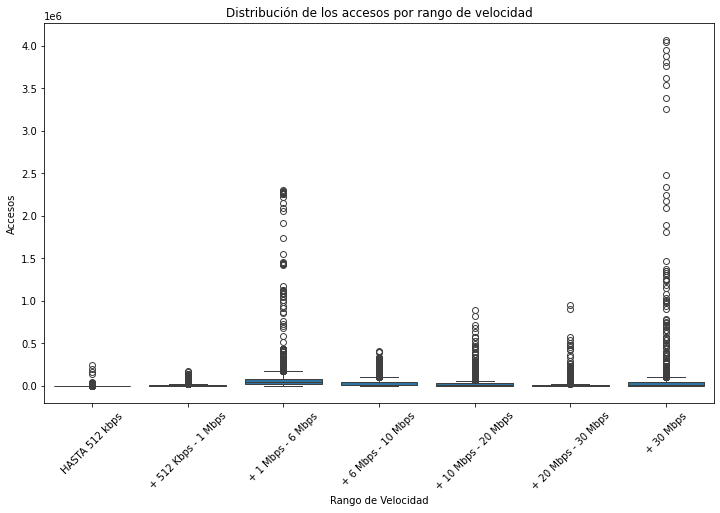

In [302]:
#Graficamos para identificar outliers 
valores=df_a_vel[['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps','+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps','+ 30 Mbps', 'Total']]
valores_graf=valores.melt(id_vars=['Total'], var_name='Rango de Velocidad', value_name='Accesos')
plt.figure(figsize=(12, 7))
sns.boxplot(x='Rango de Velocidad', y='Accesos', data=valores_graf)
plt.title('Distribución de los accesos por rango de velocidad')
plt.xticks(rotation=45)
plt.show()

Veo que los Rangos con Accesos predominantes son en + 30 mbps y ente  1 mbps  y 6 mbps de igual forma vemos que los accesos menores a 1 mbps son muy bajos y los mayores a 6 y menores a 30 son similares. Observo que hay outilers para todos los rangos.

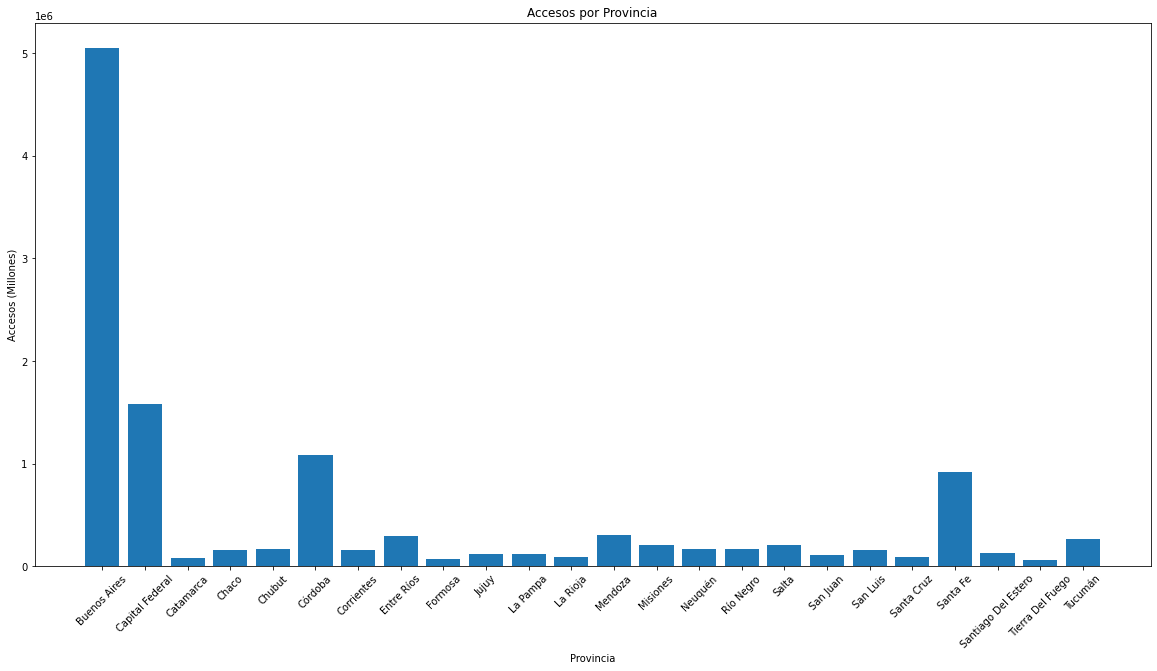

In [307]:
plt.figure(figsize=(20, 10))
plt.bar(df_a_vel['Provincia'],df_a_vel['Total'])
plt.title('Accesos por Provincia Velocidad')
plt.xticks(rotation=45)
plt.xlabel('Provincia')
plt.ylabel('Accesos (Millones)')
plt.show()

Observamos que Buenos Aires es la Provincia con mas accesos seguida de capital federal y que Tierra del fuego es la de menor cantidad al tener una diferencia tan grande entre la de mas accesos y la de menor podemos inferir que probablemente en buenos aires predominan los accesos de 30 mbps y por eso el grafico anterior nos da tantos otuliers en ese rango 

In [308]:
df_a_tec.describe()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
count,984.000000,984.000000,9.840000e+02,9.840000e+02,9.840000e+02,984.000000,984.000000,9.840000e+02
mean,2018.634146,2.463415,1.150317e+05,1.832892e+05,4.728246e+04,12385.282520,6556.766260,3.645454e+05
std,2.962686,1.128870,2.385989e+05,4.500403e+05,1.762796e+05,20996.226278,11567.922012,7.847271e+05
min,2014.000000,1.000000,2.827000e+03,0.000000e+00,0.000000e+00,0.000000,2.000000,1.255700e+04
25%,2016.000000,1.000000,2.076400e+04,1.085600e+04,3.540000e+02,734.000000,332.000000,6.177975e+04
50%,2019.000000,2.000000,4.452300e+04,4.014950e+04,2.581000e+03,5105.500000,1901.000000,1.124190e+05
75%,2021.000000,3.000000,9.148125e+04,7.582350e+04,2.554050e+04,14034.750000,7546.500000,1.927940e+05
max,2024.000000,4.000000,1.586343e+06,2.797700e+06,1.799013e+06,150290.000000,101294.000000,5.044557e+06


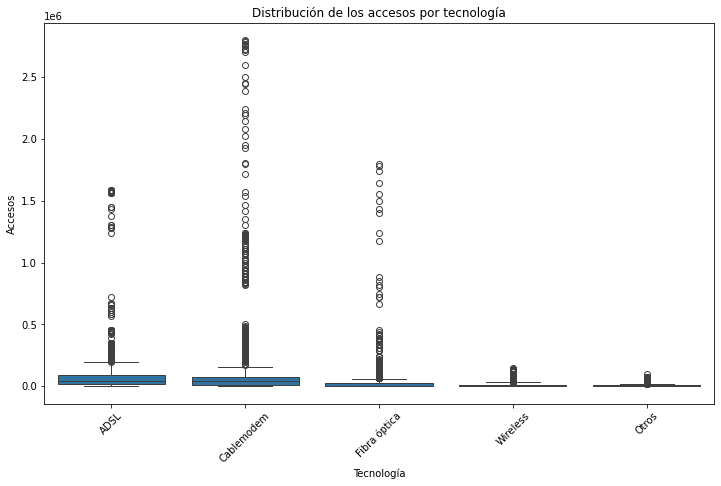

In [316]:
valores=df_a_tec[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']]
valores_graf=valores.melt(var_name='Tecnología', value_name='Accesos')
plt.figure(figsize=(12, 7))
sns.boxplot(x='Tecnología', y='Accesos', data=valores_graf)
plt.title('Distribución de los accesos por tecnología')
plt.xticks(rotation=45)
plt.show()

Se ve la diferencia de outilers entre Wireless y Otros vs ADSL Cablemodem y Fibra Optica. Estos últimos osn los que mas accesos registran 


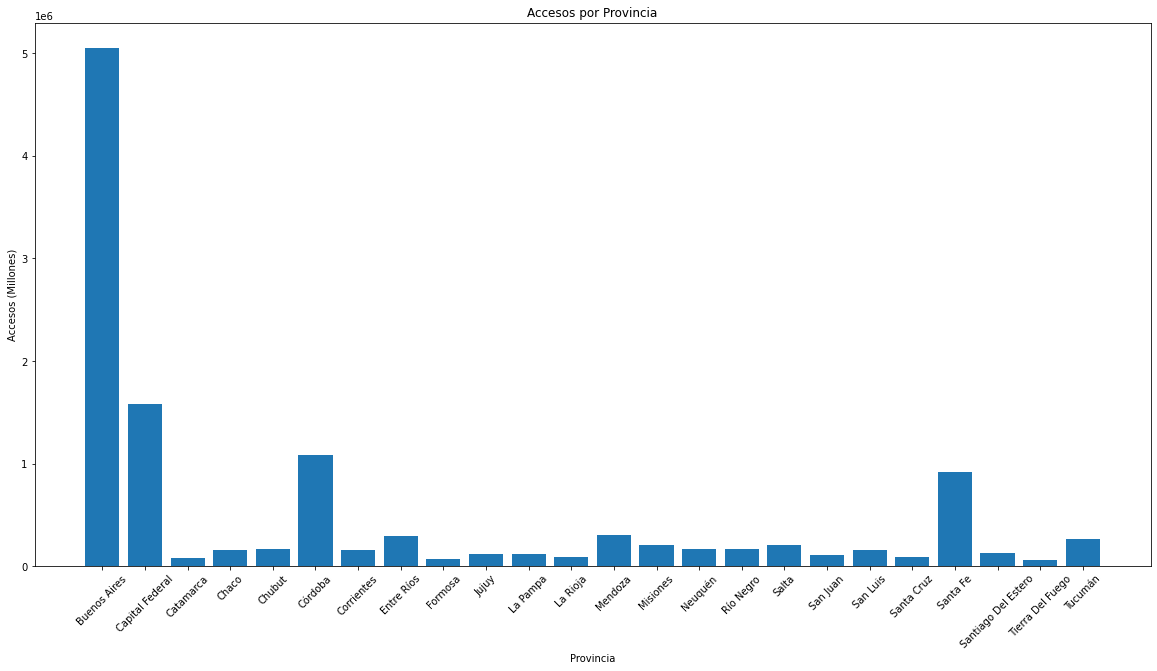

In [317]:
plt.figure(figsize=(20, 10))
plt.bar(df_a_tec['Provincia'],df_a_vel['Total'])
plt.title('Accesos por Provincia Tecnología')
plt.xticks(rotation=45)
plt.xlabel('Provincia')
plt.ylabel('Accesos (Millones)')
plt.show()

Se observan similitudes que con el df anterior por lo que podmeos concluir lo mismo que en argentina la mayoria de accesos es por Cablemodem y eso esta haciendo la presencia de outliers

In [318]:
df_p_pob.describe()

,Año,Trimestre,Accesos por cada 100 hab
count,984.000000,984.000000,984.000000
mean,2018.634146,2.463415,15.537902
std,2.962686,1.128870,9.205334
min,2014.000000,1.000000,2.684669
25%,2016.000000,1.000000,8.909018
50%,2019.000000,2.000000,13.571293
75%,2021.000000,3.000000,19.972549
max,2024.000000,4.000000,52.236739


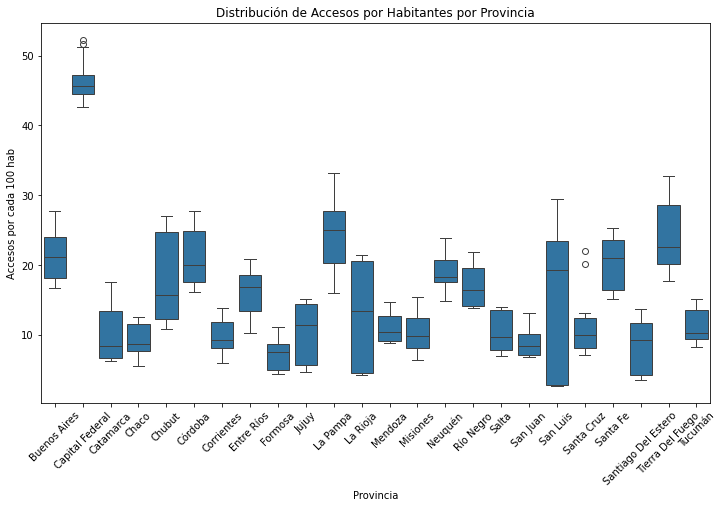

In [338]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Provincia', y='Accesos por cada 100 hab', data=df_p_pob)
plt.xticks(rotation=45)
plt.title('Distribución de Accesos por Habitantes por Provincia')
plt.show()

Observo que hay muy poco outliers y estan en el de mayor acessos y en una de las provincias de menores acessos. El que capital federal este hasta arriba en los accesos nos indica principalmente una mayor demografía con respecto a las otras provincias asi como una necesidad el uso de internet mayor a las otras provincias

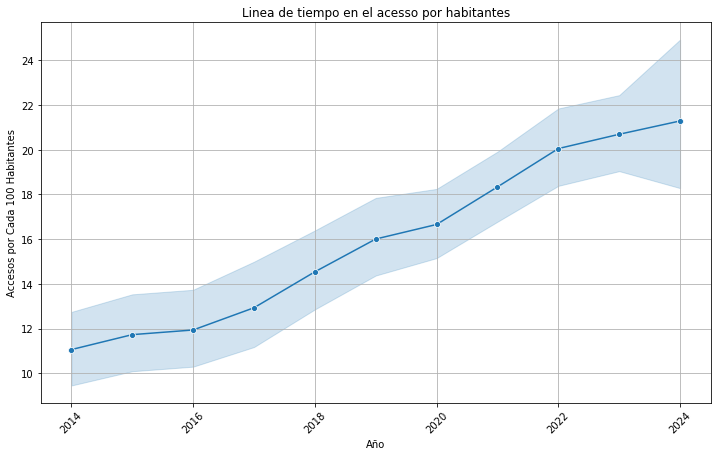

In [335]:
#Como este df no contiene mas datos para relacionar veamos como ha cambiado a lo largo del tiempo
plt.figure(figsize=(12, 7))
sns.lineplot(x='Año', y='Accesos por cada 100 hab', data=df_p_pob,marker='o')
plt.xticks(rotation=45)
plt.title('Linea de tiempo en el acesso por habitantes')
plt.xlabel('Año')
plt.ylabel('Accesos por Cada 100 Habitantes')
plt.grid(True)
plt.show()

Veo que el hay un crecimiento a lo largo del tiempo en los acessos y sin tener una certeza por no realizr los cálculos se ve una grafica de un funcion logaritmica lo que nos dice que aunque sigue creciendo el crecimiento con el paso del tiempo va disminuyendo y acercandose a un limite

In [333]:
df_p_hog.describe()

,Año,Trimestre,Accesos por cada 100 hogares
count,984.000000,984.000000,984.000000
mean,2018.634146,2.463415,52.159491
std,2.962686,1.128870,24.036101
min,2014.000000,1.000000,9.347208
25%,2016.000000,1.000000,33.204632
50%,2019.000000,2.000000,49.435000
75%,2021.000000,3.000000,65.706626
max,2024.000000,4.000000,124.061394


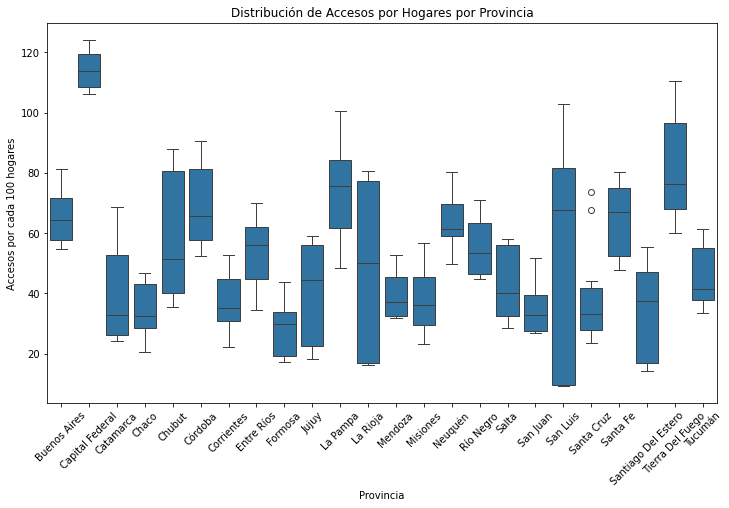

In [319]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Provincia', y='Accesos por cada 100 hogares', data=df_p_hog)
plt.xticks(rotation=45)
plt.title('Distribución de Accesos por Hogares por Provincia')
plt.show()

Veo que no hay putliers mas que en la provincia de Santa Cruz. En la distribucion vemos que Santiago del Estereo y Capital Federal son los que mas accesos presentan por cada 100 hogares siendo la capital la que tiene el mayor número con una amplia diferencia


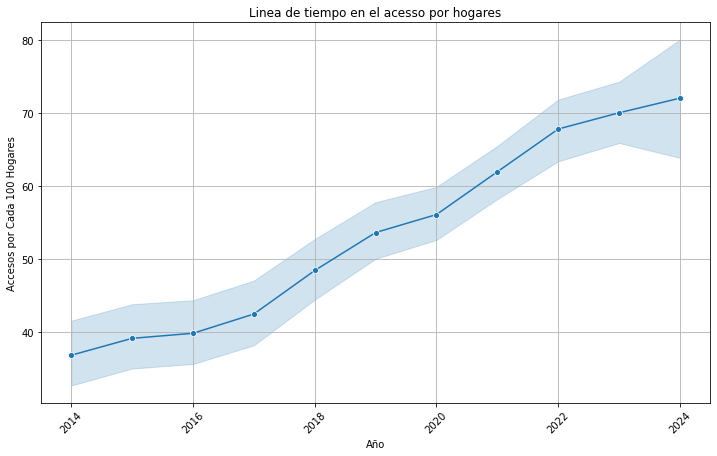

In [330]:
#Como este df no contiene mas datos para relacionar veamos como ha cambiado a lo largo del tiempo
plt.figure(figsize=(12, 7))
sns.lineplot(x='Año', y='Accesos por cada 100 hogares', data=df_p_hog,marker='o')
plt.xticks(rotation=45)
plt.title('Linea de tiempo en el acesso por hogares')
plt.xlabel('Año')
plt.ylabel('Accesos por Cada 100 Hogares')
plt.grid(True)
plt.show()

Observo que este df es muy similar al df anterior por lo que concluyo que hay una relacion de proporcionalidad directa entre habitantes y hogares en los acessos de internet. A mas hogares mas habitantes y viceversa 

In [339]:
df_p_tot.describe()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab
count,41.000000,41.000000,41.000000,41.000000
mean,2018.634146,2.463415,62.837711,19.452761
std,2.997967,1.142313,9.786571,3.211263
min,2014.000000,1.000000,49.545821,15.050104
25%,2016.000000,1.000000,53.734186,16.504676
50%,2019.000000,2.000000,62.479166,19.307907
75%,2021.000000,3.000000,70.578853,21.982550
max,2024.000000,4.000000,78.890000,24.790000


En este df vemos la suma de todas las provincias entre los acesos de hogares y habitantes vamos a graficarlo para ver si hay outliers pero puedo inferir que no basandome en las graficas de los df anteriores. Igual se puede inferir que el crecimiento a lo largo del tiempo sera similar una curva logaritmica. En vez de usar un grafico de caja y bigotes mostraremos el crecimiento en el tiempo comparando ambas habitantes y hogares 

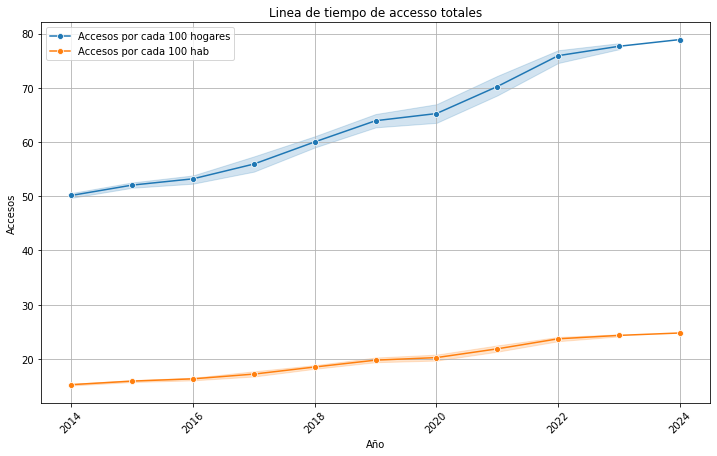

In [342]:

plt.figure(figsize=(12, 7))
sns.lineplot(x='Año', y='Accesos por cada 100 hogares', data=df_p_tot,marker='o',label='Accesos por cada 100 hogares')
sns.lineplot(x='Año', y='Accesos por cada 100 hab', data=df_p_tot,marker='o',label='Accesos por cada 100 hab')
plt.xticks(rotation=45)
plt.title('Linea de tiempo de accesso totales')
plt.xlabel('Año')
plt.ylabel('Accesos')
plt.grid(True)
plt.show()

Vemos que los accesos de hogares es mayor al de los habitantes lo que indica que en un mismo hogar hay una gran cantidad de accesos y podemos volver a observar que el crecimiento sigue siendo proporcional en ambas aunque con una velocidad distinta, el crecimiento en hogares ha sido más acelerado casi hasta duplicarse.

In [341]:
df_ing.describe()

,Año,Trimestre,Ingresos (miles de pesos)
count,41.000000,41.000000,4.100000e+01
mean,2018.634146,2.463415,3.885074e+07
std,2.997967,1.142313,5.422892e+07
min,2014.000000,1.000000,2.984054e+06
25%,2016.000000,1.000000,6.912442e+06
50%,2019.000000,2.000000,2.020741e+07
75%,2021.000000,3.000000,4.299994e+07
max,2024.000000,4.000000,2.804191e+08


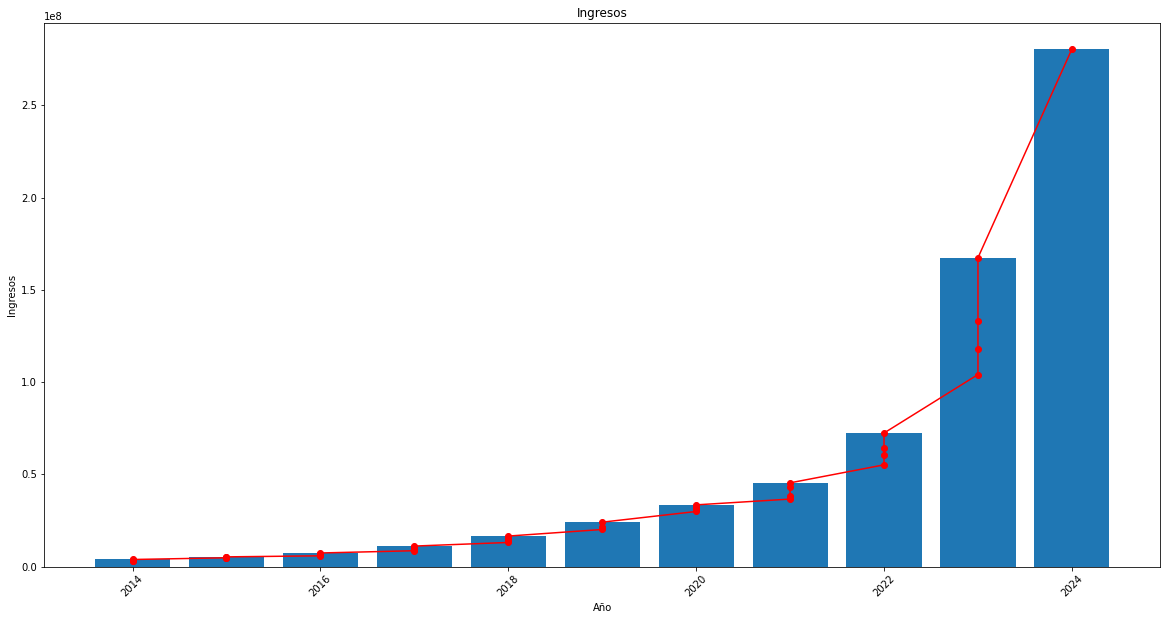

In [355]:
plt.figure(figsize=(20, 10))
plt.bar(df_ing['Año'],df_ing['Ingresos (miles de pesos)'])
plt.plot(df_ing['Año'],df_ing['Ingresos (miles de pesos)'],marker='o', color='r', label='Ingresos')
plt.title('Ingresos')
plt.xticks(rotation=45)
plt.xlabel('Año')
plt.ylabel('Ingresos')
plt.show()

Obsrvamos en la grafica un crecimiento exponencial en los ingresos por año a diferencia del crecimiento logaritmico de las otras graficas lo que nos dice que aunque el crecimiento en los acessos este siendo logaritmico el de los ingresos sigue siendo expoonencial 

## KPIS

Aumentar en un 2% el acceso al servicio de internet para el próximo trimestre, cada 100 hogares, por provincia. La fórmula es la siguiente:
KPI=((Nuevoacceso - Accesoactual)/Accesoactual)*100
Donde:

"Nuevo acceso" se refiere al número de hogares con acceso a Internet después del próximo trimestre.
"Acceso actual" se refiere al número de hogares con acceso a Internet en el trimestre actual.
Esta fórmula te ayudará a calcular el KPI para medir el aumento en el acceso a Internet por cada 100 hogares en cada provincia.

Ejemplo de uso:

KPI = ((510 - 500) / 500) * 100 = 2%

Esto indicaría un aumento del 2% en el acceso a Internet en esa provincia para el próximo trimestre.

In [356]:
#Creamos la funcion para hacer el KPI con la formula que nos dieron

def KPI_1(acceso_actual, nuevo_acceso):
    if acceso_actual != 0:
        return round((((nuevo_acceso - acceso_actual) / acceso_actual) * 100), 2)
    else:
        return 100
    
#Ordenamos el df de hogares que es donde se va aplicar
df_p_hog=df_p_hog.sort_values(by=['Provincia', 'Año', 'Trimestre'])

In [359]:
#SOlo tenemos el acesso actual en el df que es el trimestre del registro, por lo que debemos agregar una columna con el nuevo acesso que es el tirmestre siguiente cuando esta ordenado
#Después hay que aplicar la funcion del kpi ya que tengamos las columnas con los dos valores 

df_p_hog['Nuevo acceso']=df_p_hog.groupby('Provincia')['Accesos por cada 100 hogares'].shift(-1)
df_p_hog['KPI']=df_p_hog.apply(lambda row: KPI_1(row['Accesos por cada 100 hogares'], row['Nuevo acceso']), axis=1)



In [360]:
#Modificamos los nulos por 0 
df_p_hog['Nuevo acceso']=df_p_hog['Nuevo acceso'].fillna(0)
df_p_hog['Accesos por cada 100 hogares']=df_p_hog['Accesos por cada 100 hogares'].fillna(0)

In [361]:
df_p_hog.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Nuevo acceso,KPI
960,2014,1,Buenos Aires,54.570073,55.061417,0.90
936,2014,2,Buenos Aires,55.061417,56.754739,3.08
912,2014,3,Buenos Aires,56.754739,56.094337,-1.16
888,2014,4,Buenos Aires,56.094337,56.370484,0.49
864,2015,1,Buenos Aires,56.370484,56.802806,0.77


Aumentar el acceso a internet en velocidades altas en todas las provincias ya que aunque mas de 30 mbps es la que mas accesos tiene el incrementar el acceso en esta velocidad es benefico para la población en general y también es un incremento en los ingresos ya que a mayor velocidad mayor costo del servicio

KPI2=((Nuevoacceso - Accesoactual)/Accesoactual)*100

Nuevo Acceso= Número de accesos con velocidad +30 Mbps en el próximo trimestre
Acceso actual=Número de accesos con velocidad +30 Mbps en el trimestre actual


 



In [363]:
#Realizamos los mismos pasos que en el KPI anterior aplicando a los nuevos datos
df_a_vel=df_a_vel.sort_values(by=['Provincia', 'Año', 'Trimestre'])
df_a_vel['Nuevo Acceso']=df_a_vel.groupby('Provincia')['+ 30 Mbps'].shift(-1)
df_a_vel['KPI']=df_a_vel.apply(lambda row: KPI_1(row['+ 30 Mbps'], row['Nuevo Acceso']), axis=1)
df_a_vel['Nuevo Acceso']=df_a_vel['Nuevo Acceso'].fillna(0)
df_a_vel['KPI']=df_a_vel['KPI'].fillna(0)


In [364]:
df_a_vel.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total,Nuevo Acceso,KPI
960,2014,1,Buenos Aires,8469.0,171244.48,2279875.00,121787.12,38923.32,206.16,4037.0,0.0,2624542.08,4309.0,6.74
936,2014,2,Buenos Aires,6902.0,162273.72,2288771.60,140226.12,56548.92,284.32,4309.0,0.0,2659315.68,4232.0,-1.79
912,2014,3,Buenos Aires,7355.0,128186.72,2281523.60,156693.12,68946.92,243.32,4232.0,0.0,2647180.68,5406.0,27.74
888,2014,4,Buenos Aires,8226.0,132937.20,2250445.44,203620.20,104322.12,996.96,5406.0,0.0,2705953.92,5700.0,5.44
864,2015,1,Buenos Aires,8882.0,123588.88,2267851.56,220070.40,126958.44,1560.64,5700.0,0.0,2754611.92,6712.0,17.75


In [365]:
df_a_vel.to_csv('Acceso_velocidad_KPI',index=False, encoding='utf-8')
df_p_hog.to_csv('Acceso_Hogar_KPI',index=False, encoding='utf-8')
